In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

# Normal method for square matrix

In [2]:
#Normal method for square matrix
def multiply(A, B): 
  n = A.shape[0]
  result = np.zeros((n, n))
  for i in range(n):     
    for j in range(n): 
      for k in range(n):
        result[i][j] += A[i][k]*B[k][j]
  return result

# Strassen's Method

Split matrix

In [3]:
#Split matrix
def split(matrix):
    row, col = matrix.shape
    row2, col2 = row//2, col//2
    return matrix[:row2, :col2], matrix[:row2, col2:], matrix[row2:, :col2], matrix[row2:, col2:] 

Strassen's method

In [4]:
# Strassen's method
def strassen(x, y):
    # Base case when size of matrices is 1*1
    if len(x) == 1:
        return x*y
    # Splitting the matrices into quadrants. This will be done recursively
    # until the base case is reached.
    a, b, c, d = split(x)
    e, f, g, h = split(y) 
    # Computing the 7 products, recursively (p1, p2...p7)
    p1 = strassen(a, f - h) 
    p2 = strassen(a + b, h)       
    p3 = strassen(c + d, e)       
    p4 = strassen(d, g - e)       
    p5 = strassen(a + d, e + h)       
    p6 = strassen(b - d, g + h) 
    p7 = strassen(a - c, e + f)  
    # Computing the values of the 4 quadrants of the final matrix c
    c11 = p5 + p4 - p2 + p6 
    c12 = p1 + p2          
    c21 = p3 + p4           
    c22 = p1 + p5 - p3 - p7 
    # Combining the 4 quadrants into a single matrix by stacking horizontally and vertically.
    c = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))
 
    return c



Main

In [5]:
max_power = 9
length = 2**max_power
theA = np.random.randint(low=1, high=10, size=(length,length))
theB = np.random.randint(low=1, high=10, size=(length,length))
theC = np.random.randint(low=1, high=10, size=(length,length))
#let computer warm up first
C = multiply(theA, theB)
#initializations
powers = np.arange(1,max_power+1)
strassens = np.ones(len(powers))
normals = np.ones(len(powers))
prop = np.zeros(len(powers))
for i in range(len(powers)):
    power = powers[i]
    n = 2**power
    A = theA[:n,:n]
    B = theB[:n,:n]
    C = theC[:n,:n]
    #strassen
    start = time.perf_counter()
    D = strassen(A, B)
    #D = strassen(A, C)
    #D = strassen(B, C)
    end = time.perf_counter()
    strassen_time = (end-start)
    strassens[i] = strassen_time
    #normal
    start = time.perf_counter()
    D = multiply(A, B)
    #D = multiply(A, C)
    #D = multiply(B, C)
    end = time.perf_counter()
    normal_time = (end-start)
    normals[i] = normal_time
    #result
    prop[i] = strassen_time/normal_time
    print("2^", power, "done, strassen time: ", strassen_time, ", normal time: ", normal_time, "Proportion: ", prop[i])

2^ 1 done, strassen time:  5.48000000000215e-05 , normal time:  1.2699999999643552e-05 Proportion:  4.31496063004406
2^ 2 done, strassen time:  0.0003283000000000591 , normal time:  4.000000000026205e-05 Proportion:  8.207499999947709
2^ 3 done, strassen time:  0.0018468000000000373 , normal time:  0.00028439999999996246 Proportion:  6.493670886076938
2^ 4 done, strassen time:  0.008864299999999936 , normal time:  0.0021819999999999062 Proportion:  4.06246562786449
2^ 5 done, strassen time:  0.0553003000000003 , normal time:  0.017258500000000065 Proportion:  3.204235594055109
2^ 6 done, strassen time:  0.3769157999999999 , normal time:  0.1347681999999999 Proportion:  2.7967710483630426
2^ 7 done, strassen time:  2.6100374999999993 , normal time:  1.0608467 Proportion:  2.460334278270366


KeyboardInterrupt: 

Result

In [ ]:
print(strassens)
print(normals)
print(prop)
plt.xlabel('size = 2^')
plt.ylabel('proportion')
plt.grid()
plt.plot(powers, prop, marker='o')
for i in range(len(powers)):
    plt.text(powers[i], prop[i], round(prop[i],2), ha='center', va='bottom')

# Strassen's method revised

In [16]:
# Strassen's method revised
def strassen_revised(x, y, n):
    # Base case when size of matrices is (2^n)*(2^n)
    if len(x) == 2**n:
        return multiply(x,y)
    # Splitting the matrices into quadrants. This will be done recursively until the base case is reached.
    a, b, c, d = split(x)
    e, f, g, h = split(y) 
    # Computing the 7 products, recursively (p1, p2...p7)
    p1 = strassen_revised(a, f - h, n) 
    p2 = strassen_revised(a + b, h, n)       
    p3 = strassen_revised(c + d, e, n)       
    p4 = strassen_revised(d, g - e, n)       
    p5 = strassen_revised(a + d, e + h, n)       
    p6 = strassen_revised(b - d, g + h, n) 
    p7 = strassen_revised(a - c, e + f, n)  
    # Computing the values of the 4 quadrants of the final matrix c
    c11 = p5 + p4 - p2 + p6 
    c12 = p1 + p2          
    c21 = p3 + p4           
    c22 = p1 + p5 - p3 - p7  
    # Combining the 4 quadrants into a single matrix by stacking horizontally and vertically.
    c = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))    
    return c

Main

normal: 
2^ 1 done, normal time:  1.2800000149582047e-05
2^ 2 done, normal time:  4.0099999750964344e-05
2^ 3 done, normal time:  0.0002779999999802385
2^ 4 done, normal time:  0.0021716000001106295
2^ 5 done, normal time:  0.017181300000174815
2^ 6 done, normal time:  0.1328773000000183
2^ 7 done, normal time:  1.0445372999997744
2^ 8 done, normal time:  8.310617900000125
2^ 9 done, normal time:  67.39664119999998
x = 0
2^ 1 done, strassen time:  0.00013239999998404528
2^ 2 done, strassen time:  0.000325299999985873
2^ 3 done, strassen time:  0.0017330000000583823
2^ 4 done, strassen time:  0.011759600000004866
2^ 5 done, strassen time:  0.07844240000031277
2^ 6 done, strassen time:  0.5161168999998154
2^ 7 done, strassen time:  3.582477200000085
2^ 8 done, strassen time:  25.06217310000011
2^ 9 done, strassen time:  176.47649709999996
[1.32400000e-04 3.25300000e-04 1.73300000e-03 1.17596000e-02
 7.84424000e-02 5.16116900e-01 3.58247720e+00 2.50621731e+01
 1.76476497e+02]
[10.34374988

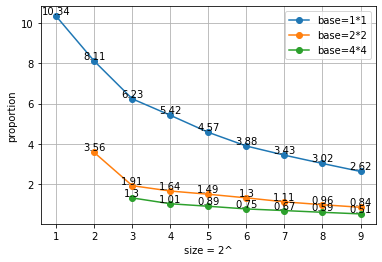

In [20]:
#start point (2^x): x range
x_range = [0,1,2]
max_power = 9
length = 2**max_power
theA = np.random.randint(low=1, high=10, size=(length,length))
theB = np.random.randint(low=1, high=10, size=(length,length))
theC = np.random.randint(low=1, high=10, size=(length,length))
#let computer warm up first
C = multiply(theA, theB)
#initializations
powers = np.arange(1,max_power+1)
normals = np.ones(len(powers))

#normal
print("normal: ")
for i in range(len(powers)):
    power = powers[i]
    n = 2**power
    A = theA[:n,:n]
    B = theB[:n,:n]
    C = theC[:n,:n]
    #normal
    start = time.perf_counter()
    D = multiply(A, B)
    #D = multiply(A, C)
    #D = multiply(B, C)
    end = time.perf_counter()
    normal_time = (end-start)
    normals[i] = normal_time
    print("2^", power, "done, normal time: ", normal_time)
    
#strassen revised
for i in range(len(x_range)):
    x = x_range[i]
    print("x =", x)
    powers_new = np.arange(x+1, max_power+1)
    strassens_new = np.zeros(len(powers_new))
    prop_new = np.zeros(len(powers_new))
    for j in range(len(powers_new)):
        power = powers_new[j]
        n = 2**power
        A = theA[:n,:n]
        B = theB[:n,:n]
        C = theC[:n,:n]
        #strassen
        start = time.perf_counter()
        D = strassen_revised(A, B, x)
        #D = strassen_revised(A, C, x)
        #D = strassen_revised(B, C, x)
        end = time.perf_counter()
        strassen_time_new = (end-start)
        strassens_new[j] = strassen_time_new
        #result
        prop_new[j] = strassen_time_new/(normals[j+x])
        print("2^", power, "done, strassen time: ", strassen_time_new)
    print(strassens_new)
    print(prop_new)
    plt.plot(powers_new, prop_new, marker='o', label="base={}*{}".format(2**x, 2**x))
    for k in range(len(powers_new)):
        plt.text(powers_new[k], prop_new[k], round(prop_new[k],2), ha='center', va='bottom')
plt.xlabel('size = 2^')
plt.ylabel('proportion')
plt.grid()
plt.legend()